## This notebook can help to analyse data of cases or deaths caused by COVID19 against vaccination percentage (either fully vaccinated or vaccinated with booster shot) across counties in US

### Choosen time period in format "mm/dd/yyyy" [with current data possible between 12/13/2020 -  02/01/2022]
The beginning of administration of booster shot is 12/15/2021. Keep this in mind depending of what data is to be analysed.
Look below at the graphs to see picks in cases and deaths accross US

In [75]:
period_start = '01/01/2022'
period_end = '01/31/2022'

### Choose the maximum and minimum population size of counties taken into consideration
The cases and deaths will be shown per 10000 inhabitants

In [76]:
pop_min = 0
pop_max = 100000000000000

In [77]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

In [78]:
#Path to save figures
path = "figures/"

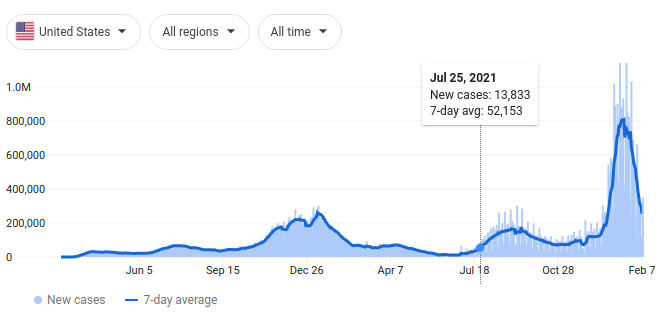

In [79]:
#Show cases plot from GOOGLE
Image(filename='cases.png') 

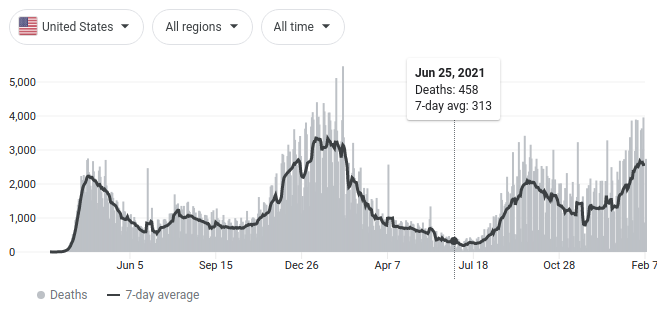

In [80]:
#Show deaths plot from GOOGLE
Image(filename='deaths.png') 

In [81]:
#Read population data [aquired from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/]
df_pop = pd.read_csv('covid_county_population_usafacts.csv')

In [82]:
#Used functions and shared variables [Cases/Deaths processing]
def reformat_date(date):
    month, day, year = date.split("/")
    return year + "-" + month + "-" + day

def get_population(fips_list):
    temp_pop = list()
    for fips in fips_list:
        temp = df_pop.loc[(df_pop['countyFIPS'] == fips)]['population']
        temp_pop.append(temp.item())
    return temp_pop

columns = ['countyFIPS', 'County Name', 'State', reformat_date(period_start), reformat_date(period_end)]

In [83]:
#Proccess data related to deaths due to COVID-19 [aquired from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/]
df = pd.read_csv('covid_deaths_usafacts.csv')

df_new = df.loc[:, columns]
filtered = df_new[ df_new['countyFIPS'] != 0 ]
filtered.to_csv("deaths.csv", index = False)

df_deaths = pd.read_csv('deaths.csv')
temp_pop = get_population(list(df_deaths['countyFIPS']))
df_deaths.insert(3, 'Population', temp_pop)
df_deaths.columns = ['countyFIPS', 'County Name', 'State','Population',  'Deaths_begin', 'Deaths_end']
df_deaths.to_csv("deaths_pop.csv", index = False)

In [84]:
#Proccess data related to number of infections (cases) of COVID-19 [aquired from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/]
df = pd.read_csv('covid_confirmed_usafacts.csv')

df_new = df.loc[:, columns]
filtered = df_new[ df_new['countyFIPS'] != 0 ]
filtered.to_csv("cases.csv", index = False)

df_cases = pd.read_csv('cases.csv')
temp_pop = get_population(list(df_cases['countyFIPS']))
df_cases.insert(3, 'Population', temp_pop)
df_cases.columns = ['countyFIPS', 'County Name', 'State','Population','Cases_begin', 'Cases_end']
df_cases.to_csv("cases_pop.csv", index = False)

In [85]:
#Process data related to COVID-19 vaccination rates [aquired from: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh]
df2 = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_County.csv')

to_idx = max(df2.index[df2['Date'] == period_start].tolist())+1
from_idx = min(df2.index[df2['Date'] == period_end].tolist())
df_vax = df2[from_idx:to_idx]

df_vax.to_csv("vax.csv", index = False)
df_notnull = df_vax[df_vax['Series_Complete_Yes'].notnull()] #or Booster_Doses
df_notnull.to_csv("vax_no_missing_data.csv", index = False)

fips_counties = list(df_cases['countyFIPS'])
fips_to_delete = list()
vax_data = list()
for fips in fips_counties:
    fips_f = '0' * (5 - len(str(fips))) + str(fips)
    temp = df_notnull.loc[(df_notnull['FIPS'] == fips_f) & (df_notnull['Date'] == period_start)]
    temp2 = df_notnull.loc[(df_notnull['FIPS'] == fips_f) & (df_notnull['Date'] == period_end)]
    if len(temp) == 1 and len(temp2) == 1:
        vax_data.append([fips, temp['Booster_Doses'].item(), temp2['Booster_Doses'].item(),
                         temp['Booster_Doses_Vax_Pct'].item(), temp2['Booster_Doses_Vax_Pct'].item(),
                         temp['Booster_Doses_18Plus'].item(), temp2['Booster_Doses_18Plus'].item(),
                         temp['Booster_Doses_18Plus_Vax_Pct'].item(), temp2['Booster_Doses_18Plus_Vax_Pct'].item(),
                         temp['Booster_Doses_65Plus'].item(), temp2['Booster_Doses_65Plus'].item(),
                         temp['Booster_Doses_65Plus_Vax_Pct'].item(), temp2['Booster_Doses_65Plus_Vax_Pct'].item(),
                         temp['Series_Complete_Yes'].item(), temp2['Series_Complete_Yes'].item(),
                         temp['Series_Complete_Pop_Pct'].item(), temp2['Series_Complete_Pop_Pct'].item(),
                         temp['Series_Complete_18Plus'].item(), temp2['Series_Complete_18Plus'].item(),
                         temp['Series_Complete_18PlusPop_Pct'].item(), temp2['Series_Complete_18PlusPop_Pct'].item(),
                         temp['Series_Complete_65Plus'].item(), temp2['Series_Complete_65Plus'].item(),
                         temp['Series_Complete_65PlusPop_Pct'].item(), temp2['Series_Complete_65PlusPop_Pct'].item()])
col = ['countyFIPS',
       'Booster_begin', 'Booster_end',
       'Booster_pct_begin', 'Booster_pct_end',
       'Booster18_begin', 'Booster18_end',
       'Booster18_pct_begin', 'Booster18_pct_end',
       'Booster65_begin', 'Booster65_end',
       'Booster65_pct_begin', 'Booster65_pct_end',
       'Complete_begin', 'Complete_end',
       'Complete_pct_begin', 'Complete_pct_end',
       'Complete18_begin', 'Complete18_end',
       'Complete18_pct_begin', 'Complete18_pct_end',
       'Complete65_begin', 'Complete65_end',
       'Complete65_pct_begin','Complete65_pct_end']

df_data = pd.DataFrame(vax_data, columns = col)  
df_data.to_csv("vax_processed.csv", index=False)

In [86]:
#Combine cases/deaths and vaccination data
df_deaths = pd.read_csv('deaths_pop.csv')
df_cases = pd.read_csv('cases_pop.csv')
df_vax = pd.read_csv('vax_processed.csv')

df_all = pd.concat([df_cases, df_deaths, df_vax], axis=1, join="inner")
df_all = df_all.loc[:,~df_all.columns.duplicated()]

df_all['Cases_diff'] = df_all['Cases_end'] - df_all['Cases_begin']
df_all['Cases_diff_pct'] = (df_all['Cases_end'] - df_all['Cases_begin'])*100/ df_all['Population']
df_all['Deaths_diff'] = df_all['Deaths_end'] - df_all['Deaths_begin']
df_all['Deaths_diff_pct'] = (df_all['Deaths_end'] - df_all['Deaths_begin'])*100/ df_all['Population']

df_all.to_csv("vax_cases_deaths.csv", index = False)

In [100]:
#Clean and filter the data
filter_pop = df_all[ (df_all['Population'] > pop_min) & (df_all['Population'] < pop_max) ]
filter_pop = filter_pop[ filter_pop['Complete_pct_end'] != 0 ]
filter_pop = filter_pop[ filter_pop['Deaths_begin'] < filter_pop['Deaths_end'] ]
filter_pop = filter_pop[ filter_pop['Cases_begin'] < filter_pop['Cases_end'] ]
#filter_cases = filter_cases[ filter_cases['Cases_diff'] > 10 ]
    
filter_pop['Infections per 10k inhabitants'] = (filter_pop['Cases_diff'])*10000/filter_pop['Population']
filter_pop['Deaths per 10k inhabitants'] = (filter_pop['Deaths_diff'])*10000/filter_pop['Population']
filter_pop['Percentage of fully vaccinated'] = (filter_pop['Complete_pct_begin'] + filter_pop['Complete_pct_end'])/2
filter_pop['Percentage of vaccinated with booster'] = (filter_pop['Complete_pct_begin'] + filter_pop['Complete_pct_end'])/2

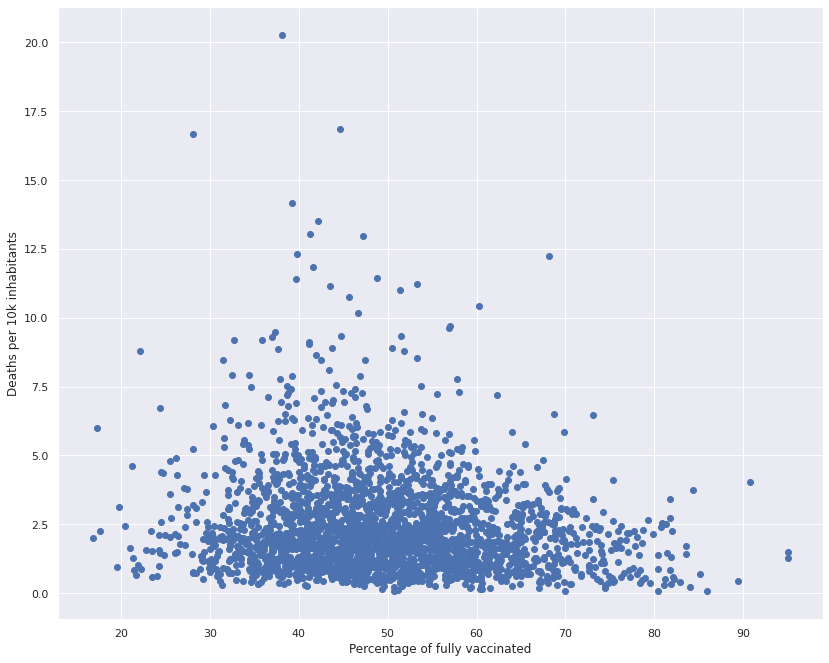

In [101]:
#Present the data of number of deaths caused by COVID19 against percentage of fully vaccinated
plt.scatter(avg_completed, new_deaths_per_10k)
plt.xlabel('Percentage of fully vaccinated')
plt.ylabel('Deaths per 10k inhabitants')
plt.savefig(path + 'fulvax_deaths_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

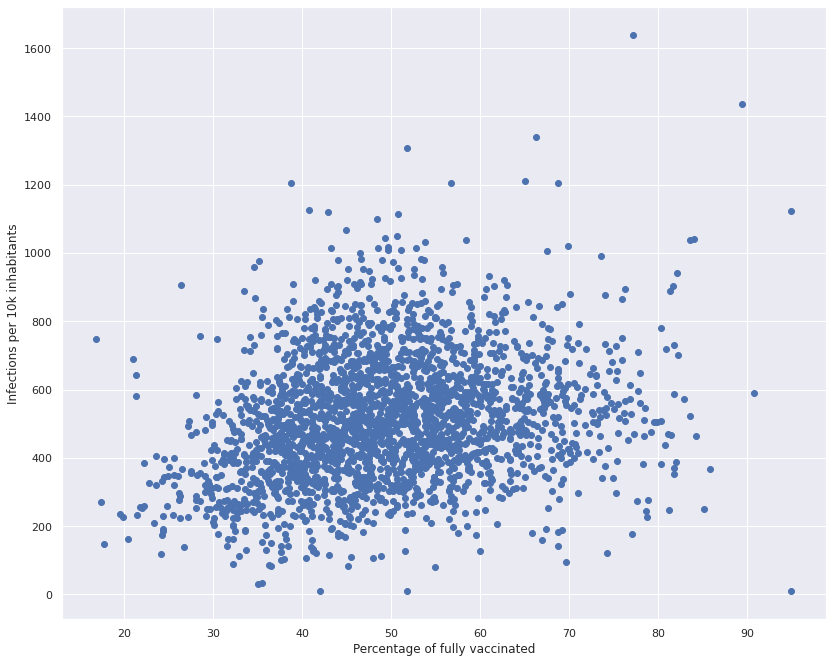

In [102]:
#Present the data of number of cases of infections with COVID19 against percentage of fully vaccinated
plt.scatter(filter_pop['Percentage of fully vaccinated'], filter_pop['Infections per 10k inhabitants'])
plt.xlabel('Percentage of fully vaccinated')
plt.ylabel('Infections per 10k inhabitants')
plt.savefig(path + 'fulvax_cases_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

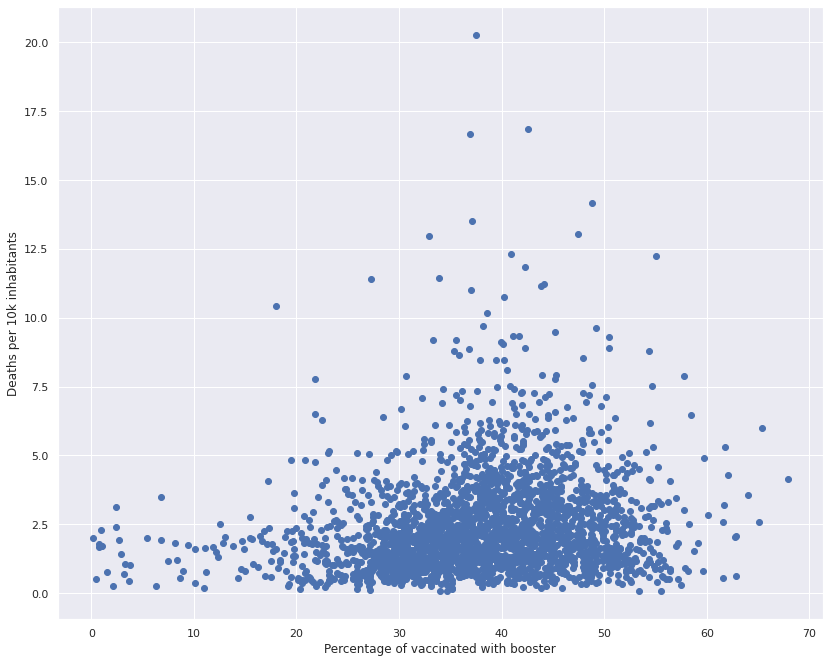

In [103]:
#Present the data of number of deaths caused by COVID19 against percentage of boosted
plt.scatter(avg_boosted, new_deaths_per_10k)
plt.xlabel('Percentage of vaccinated with booster')
plt.ylabel('Deaths per 10k inhabitants')
plt.savefig(path + 'booster_deaths_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

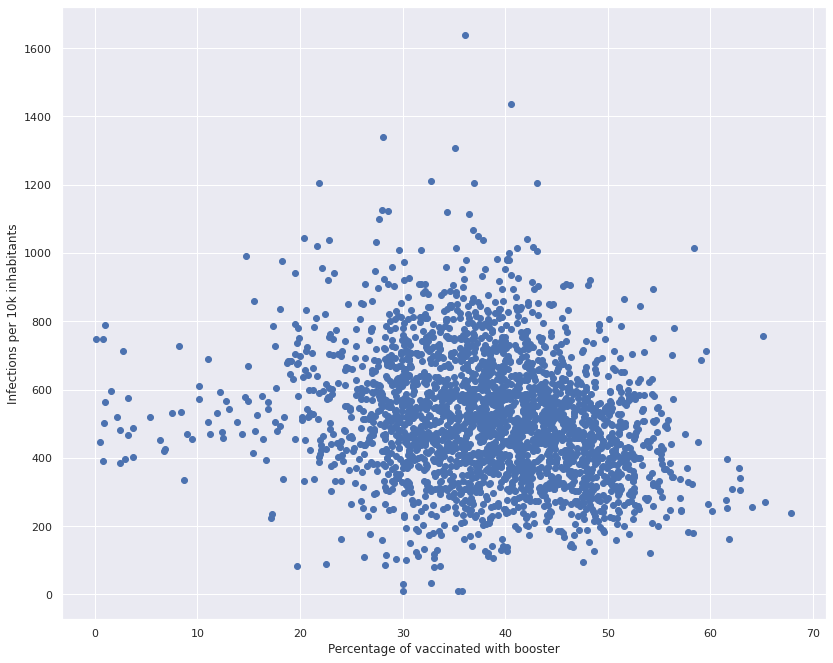

In [104]:
#Present the data of number of cases of infections with COVID19 against percentage of boosted
plt.scatter(avg_boosted, new_cases_per_10k)
plt.xlabel('Percentage of vaccinated with booster')
plt.ylabel('Infections per 10k inhabitants')
plt.savefig(path + 'booster_cases_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

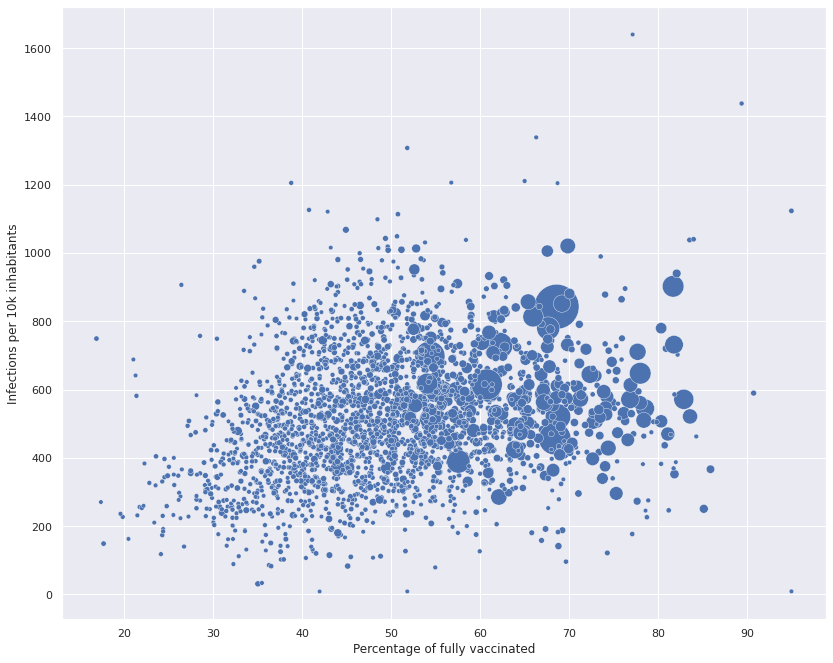

In [105]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x="Percentage of fully vaccinated", y="Infections per 10k inhabitants", size="Population", legend=False, sizes=(20, 2000))
# show the graph
plt.show()

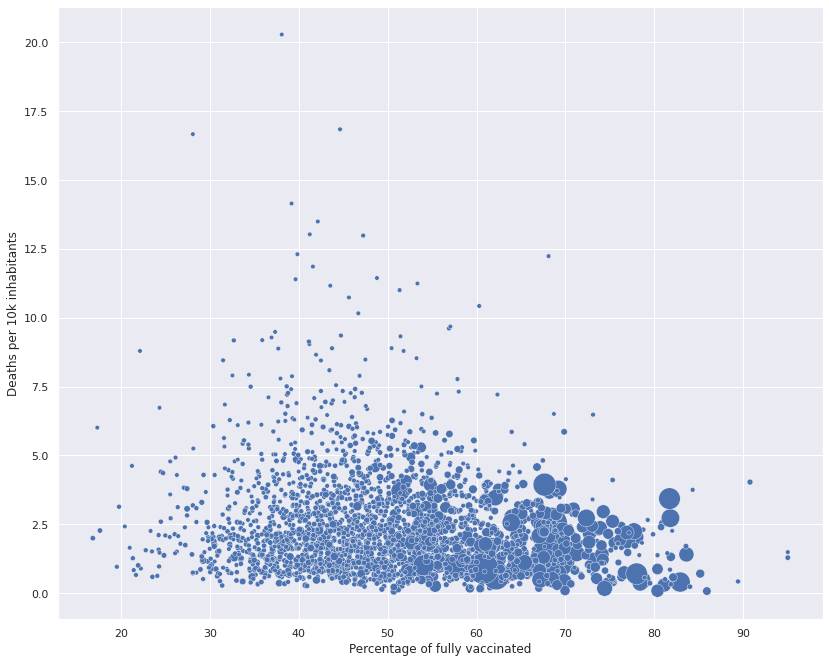

In [106]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x="Percentage of fully vaccinated", y="Deaths per 10k inhabitants", size="Population", legend=False, sizes=(20, 2000))
# show the graph
plt.show()

In [107]:
filter_pop

,countyFIPS,County Name,State,Population,Cases_begin,Cases_end,Deaths_begin,Deaths_end,Booster_begin,Booster_end,...,Complete65_pct_begin,Complete65_pct_end,Cases_diff,Cases_diff_pct,Deaths_diff,Deaths_diff_pct,Infections per 10k inhabitants,Deaths per 10k inhabitants,Percentage of fully vaccinated,Percentage of vaccinated with booster
0,1001,Autauga County,AL,55869,11018,13251,160,163,5673.0,7245.0,...,67.1,70.3,2233,3.996850,3,0.005370,399.684977,0.536970,40.50,40.50
1,1003,Baldwin County,AL,223234,39911,50313,593,608,29599.0,36335.0,...,80.7,82.3,10402,4.659684,15,0.006719,465.968446,0.671941,48.60,48.60
2,1005,Barbour County,AL,24686,3860,5054,81,83,2439.0,3259.0,...,70.1,71.3,1194,4.836750,2,0.008102,483.674957,0.810176,42.85,42.85
4,1009,Blount County,AL,57826,11256,13427,198,204,4417.0,5465.0,...,52.7,53.4,2171,3.754367,6,0.010376,375.436655,1.037596,30.20,30.20
6,1013,Butler County,AL,19448,3613,4519,102,106,1790.0,2197.0,...,63.5,64.6,906,4.658577,4,0.020568,465.857672,2.056767,37.75,37.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,42343,8320,10290,107,115,6446.0,7726.0,...,87.5,89.5,1970,4.652481,8,0.018893,465.248093,1.889332,46.10,46.10
3138,56039,Teton County,WY,23464,5950,9323,14,15,7798.0,9210.0,...,95.0,95.0,3373,14.375213,1,0.004262,1437.521309,0.426185,89.40,89.40
3139,56041,Uinta County,WY,20226,4154,5335,31,34,3107.0,3723.0,...,85.0,87.7,1181,5.839019,3,0.014832,583.901908,1.483239,47.75,47.75
3140,56043,Washakie County,WY,7805,1880,2180,37,41,1352.0,1567.0,...,78.3,80.5,300,3.843690,4,0.051249,384.368994,5.124920,41.55,41.55
